<a id='top'></a>
<h1 style="text-align:center;font-size:200%;;">Real or Not? NLP with Disaster Tweets</h1>


<a id='libraries'></a>
## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


<a id='load'></a>
# 2. Load Data

In [3]:
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
submission =  pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<ul style="list-style-type:square;">
  <li><span class="label label-default">id</span> a unique identifier for each tweet</li>
  <li><span class="label label-default">text </span> the text of the tweet</li>
  <li><span class="label label-default">location</span>  the location the tweet was sent from (may be blank)</li>
    <li><span class="label label-default">keyword</span>  a particular keyword from the tweet (may be blank)</li>
    <li><span class="label label-default">target</span>  in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)</li>
</ul>


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<a id='visual'></a>
# 3. Visualization of data

In [10]:
missing = train.isnull().sum()
missing[missing>0].sort_values(ascending=False).iplot(kind='bar',title='Null values present in train Dataset', color=['red'])

In [11]:
train.target.value_counts().iplot(kind='bar',text=['Fake', 'Real'], title='Comparing Tweet is a real disaster (1) or not (0)',color=['blue'])

In [12]:
counts_train = train.target.value_counts(sort=False)
labels = counts_train.index
values_train = counts_train.values

data = go.Pie(labels=labels, values=values_train ,pull=[0.03, 0])
layout = go.Layout(title='Comparing Tweet is a real disaster (1) or not (0) in %')

fig = go.Figure(data=[data], layout=layout)
fig.update_traces(hole=.3, hoverinfo="label+percent+value")
fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Train', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [13]:
train['length'] = train['text'].apply(len)

In [14]:
train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [15]:
data = [
    go.Box(
        y=train[train['target']==0]['length'],
        name='Fake'
    ),
    go.Box(
        y=train[train['target']==1]['length'],
        name='Real'
    )
]
layout = go.Layout(
    title = 'Comparison of text length in Tweets '
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [16]:
train.keyword.nunique()  # Total of 221 unique keywords

221

In [17]:

train.keyword.value_counts()[:20].iplot(kind='bar', title='Top 20 keywords in text', color='green')

In [18]:
train.location.value_counts()[:20].iplot(kind='bar', title='Top 20 location in tweet', color='blue')  # Check the top 15 locations 

 <a id='word'></a>
#  4. WordCloud

In [19]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [20]:
train.text.values

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       ...,
       'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
       'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
       'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'],
      dtype=object)

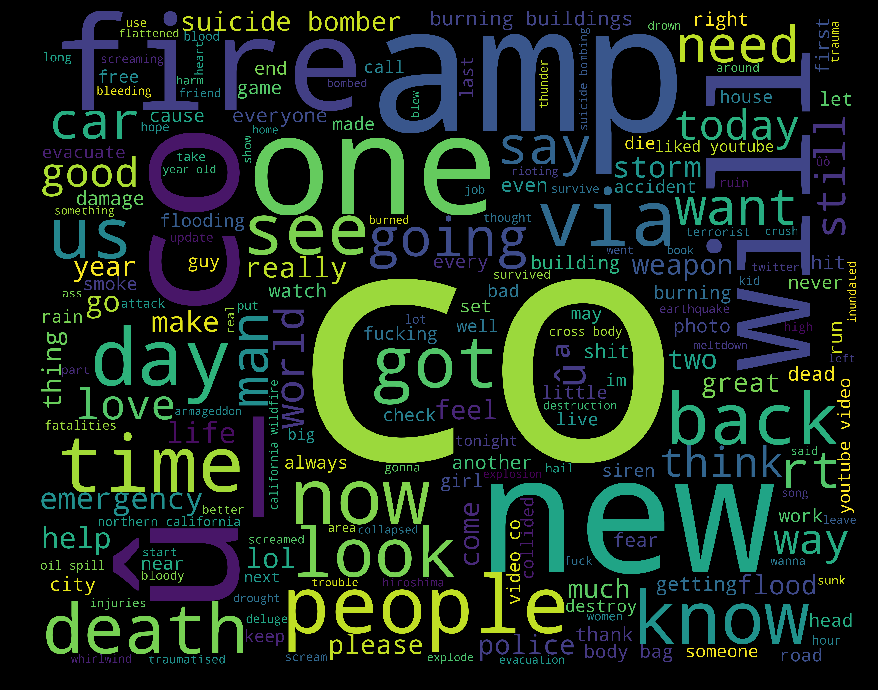

In [21]:
text = train.text.values

Plot_world(text)


<a id='clean'></a>
# 5. Cleaning the text

In [22]:
#How many http words has this text?
train.loc[train['text'].str.contains('http')].target.value_counts()

1    2172
0    1799
Name: target, dtype: int64

In [23]:
pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

In [24]:
# Remove all text that start with html
train['text']=train['text'].apply(lambda x : remove_html(x))

In [25]:
# lets check if this clean works
train.loc[train['text'].str.contains('http')].target.value_counts()

0    1
Name: target, dtype: int64

In [26]:
# Remove all text that start with html in test
test['text']=test['text'].apply(lambda x : remove_html(x))

In [27]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO)


### Now remove stopwords, pass to lower add delimiter and more

In [28]:
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  

    text = text.lower()  

    # split to array(default delimiter is " ") 
    text = text.split()  
    
    text = [w for w in text if not w in set(stopwords.words('english'))] 

    text = ' '.join(text)    
            
    return text

In [29]:
text = train.text[3]
print(text)
clean_text(text)

13,000 people receive #wildfires evacuation orders in California 


'people receive wildfires evacuation orders california'

In [30]:
# Apply clean text 
train['text'] = train['text'].apply(lambda x : clean_text(x))

In [31]:
# Apply clean text 
test['text']=test['text'].apply(lambda x : clean_text(x))

In [32]:
# How many unique words have this text
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

In [33]:
text_values = train["text"]

counter = counter_word(text_values)

In [34]:
print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 16070


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56)]

In [35]:
train.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,69
1,4,NaN,NaN,forest fire near la ronge sask canada,1,38
2,5,NaN,NaN,residents asked shelter place notified officer...,1,133
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1,65
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88


In [36]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,happened terrible car crash
1,2,NaN,NaN,heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,apocalypse lighting spokane wildfires
4,11,NaN,NaN,typhoon soudelor kills china taiwan


<a id='split'></a>
# 6. Train Test Split

In [39]:
len(counter)

16070

In [40]:
# The maximum number of words to be used. (most frequent)

vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint.
max_length = 20
trunc_type='post'
padding_type='post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

In [41]:
# this is base in 80% of the data, an only text and targert at this moment

training_sentences = train.text[0:training_size]
training_labels = train.target[0:training_size]

testing_sentences = train.text[training_size:]
testing_labels = train.target[training_size:]

In [42]:

print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',testing_sentences.shape)


The Shape of training  (6090,)
The Shape of testing (1523,)


In [45]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)


In [46]:
word_index = tokenizer.word_index

In [47]:
# Lets see the first 10 elements
print("THe first word Index are: ")
for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))

# If you want to see completed -> word_index

THe first word Index are: 
 <XXX>,  1 
 amp,  2 
 like,  3 
 fire,  4 
 get,  5 
 via,  6 
 new,  7 
 people,  8 
 news,  9 
 emergency,  10 
 one,  11 
 disaster,  12 
 body,  13 
 video,  14 
 burning,  15 


In [48]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [53]:
print(train.text[1001])
print(training_sequences[1001])

drake fan enjoy seeing body bagging people great marketing lol
[596, 382, 1538, 801, 13, 313, 8, 140, 2391, 115]


## check Inverse for see how it works

In [54]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [55]:
# Lets see the first 10 elements
print("THe first reverse word Index are: ")
for x in list(reverse_word_index)[0:15]:
    print (" {},  {} ".format(x,  reverse_word_index[x]))

# If you want to see completed -> reverse_word_index

THe first reverse word Index are: 
 1,  <XXX> 
 2,  amp 
 3,  like 
 4,  fire 
 5,  get 
 6,  via 
 7,  new 
 8,  people 
 9,  news 
 10,  emergency 
 11,  one 
 12,  disaster 
 13,  body 
 14,  video 
 15,  burning 


In [56]:
def decode(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [57]:
decode(training_sequences[1]) # this can be usefull for check predictions

'forest fire near la ronge sask canada'

In [58]:
training_padded[1628]

array([7779, 1150, 2107,  629, 2106, 1257,   52,  326, 2106, 1257,   52,
        326, 7780,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [59]:

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



<a id='model'></a>
# 7. Creating the Model

    # For a binary classification problem
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                                    

In [60]:
# Model Definition with LSTM

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # remember this is a binary clasification
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [61]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            514240    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 14)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 565,725
Trainable params: 565,725
Non-trainable params: 0
_________________________________________________________________


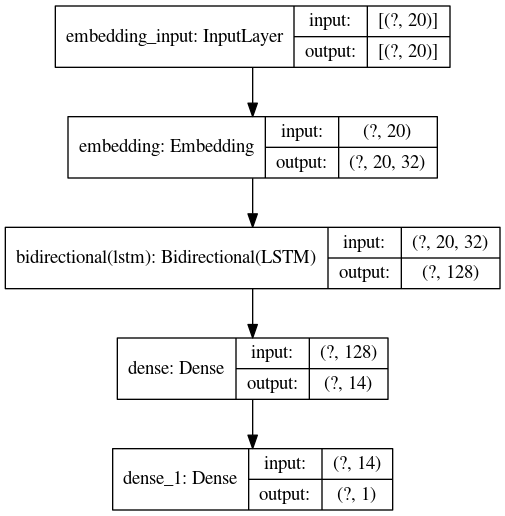

In [62]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [63]:

start_time = time.time()

num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

final_time = (time.time()- start_time)/60
print(f'The time in minutos: {final_time}')


Train on 6090 samples, validate on 1523 samples
Epoch 1/10
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.5486 - accuracy: 0.7148 - val_loss: 0.4629 - val_accuracy: 0.7840
Epoch 2/10
6090/6090 [==============================] - 4s 625us/sample - loss: 0.2895 - accuracy: 0.8906 - val_loss: 0.5330 - val_accuracy: 0.7367
Epoch 3/10
6090/6090 [==============================] - 4s 625us/sample - loss: 0.1695 - accuracy: 0.9437 - val_loss: 0.6259 - val_accuracy: 0.7498
Epoch 4/10
6090/6090 [==============================] - 4s 630us/sample - loss: 0.1182 - accuracy: 0.9609 - val_loss: 0.6618 - val_accuracy: 0.7479
Epoch 5/10
6090/6090 [==============================] - 4s 615us/sample - loss: 0.0887 - accuracy: 0.9711 - val_loss: 0.7208 - val_accuracy: 0.7544
Epoch 6/10
6090/6090 [==============================] - 4s 611us/sample - loss: 0.0720 - accuracy: 0.9737 - val_loss: 0.9347 - val_accuracy: 0.7380
Epoch 7/10
6090/6090 [==============================] - 4s 606us/s

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.548582,0.714778,0.462887,0.783979
1,0.289477,0.890640,0.533011,0.736704
2,0.169525,0.943678,0.625918,0.749836
3,0.118244,0.960920,0.661784,0.747866
4,0.088657,0.971100,0.720777,0.754432


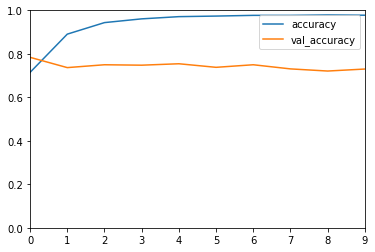

In [65]:
model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);

<a id='eval'></a>
# 8. Model Evaluation

In [66]:
predictions = model.predict_classes(testing_padded)   # predict_ clases because is classification problem with the split test

In [67]:
predictions

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
# Showing Confusion Matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

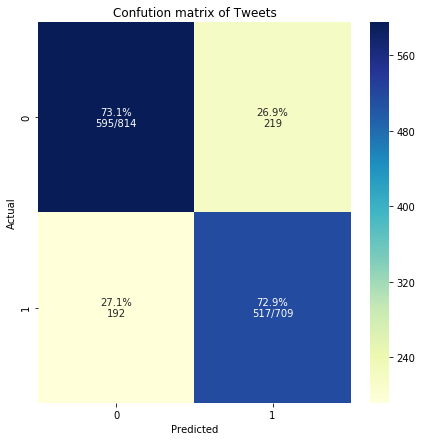

In [70]:
# Showing Confusion Matrix
plot_cm(testing_labels,predictions, 'Confution matrix of Tweets', figsize=(7,7))

# Now working with test dataset

In [71]:

testing_sequences2 = tokenizer.texts_to_sequences(test.text)
testing_padded2 = pad_sequences(testing_sequences2, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [72]:
predictions = model.predict(testing_padded2)

In [73]:
# sample of submission
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [74]:
submission['target'] = (predictions > 0.5).astype(int)

In [75]:
submission

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
